# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

A dataset was collected from a Portuguese bank that conducted direct marketing campaigns between May 2008 and November 2010. The bank used its in-house contact center for the campaigns, primarily relying on telephone calls with human agents but occasionally using the Internet for supplemental information. 
Key details about the campaign and dataset:

- Campaigns: Over the two-and-a-half-year period, there were 17 separate campaigns.
- Product: The offer was an attractive long-term deposit application with good interest rates.
- Contacts: The campaigns resulted in 79,354 total contacts with customers.
- Variables: A large number of attributes were recorded for each customer contact.
- Outcome: The primary target variable was whether the customer subscribed to the deposit (a "success").
- Success Rate: Across the entire database, there were 6,499 successes, an 8% success rate. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Additional libraries
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Steps to understand the Data
- Identify columns with missing values
- Identify uniq values for columns

In [4]:
all_columns = list(df.columns)
# Identify columns with missing values
missing_values = df[all_columns].isna().sum()/len(df) * 100
print("All Column with % of missing values")
for col in all_columns:
    print(f"- {col}: {missing_values[col]:.2f}% missing values")

All Column with % of missing values
- age: 0.00% missing values
- job: 0.00% missing values
- marital: 0.00% missing values
- education: 0.00% missing values
- default: 0.00% missing values
- housing: 0.00% missing values
- loan: 0.00% missing values
- contact: 0.00% missing values
- month: 0.00% missing values
- day_of_week: 0.00% missing values
- duration: 0.00% missing values
- campaign: 0.00% missing values
- pdays: 0.00% missing values
- previous: 0.00% missing values
- poutcome: 0.00% missing values
- emp.var.rate: 0.00% missing values
- cons.price.idx: 0.00% missing values
- cons.conf.idx: 0.00% missing values
- euribor3m: 0.00% missing values
- nr.employed: 0.00% missing values
- y: 0.00% missing values


### Preprocessing numerical columns: Identify the numerical columns and their distributions.

- We will drop 'duration' column per the dataset information

In [5]:
part_1_num_df = df.select_dtypes(include=np.number)
part_1_num_df.info()

part_1_num_df = part_1_num_df.drop(['duration'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [6]:
part_1_num_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


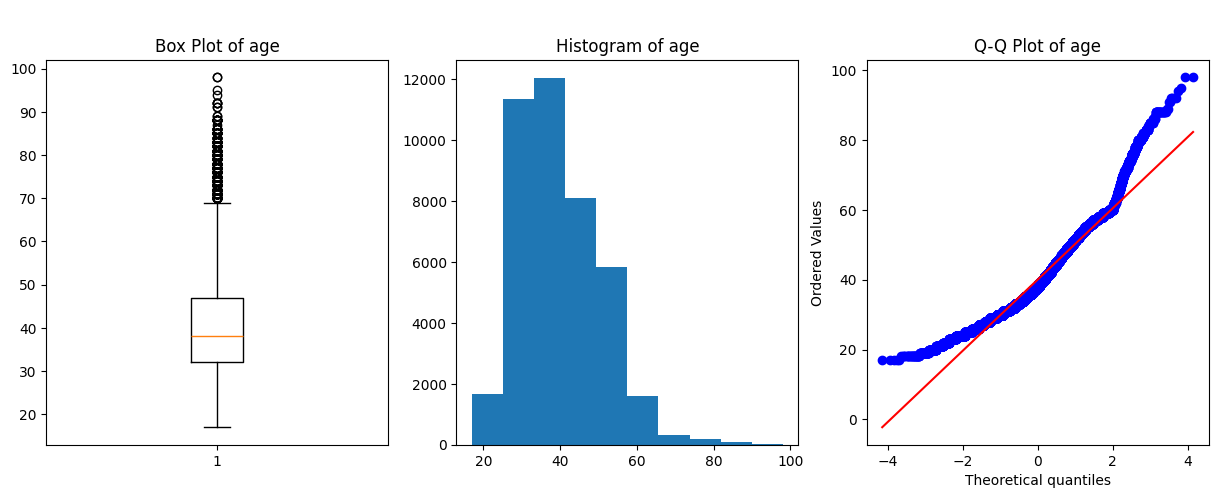

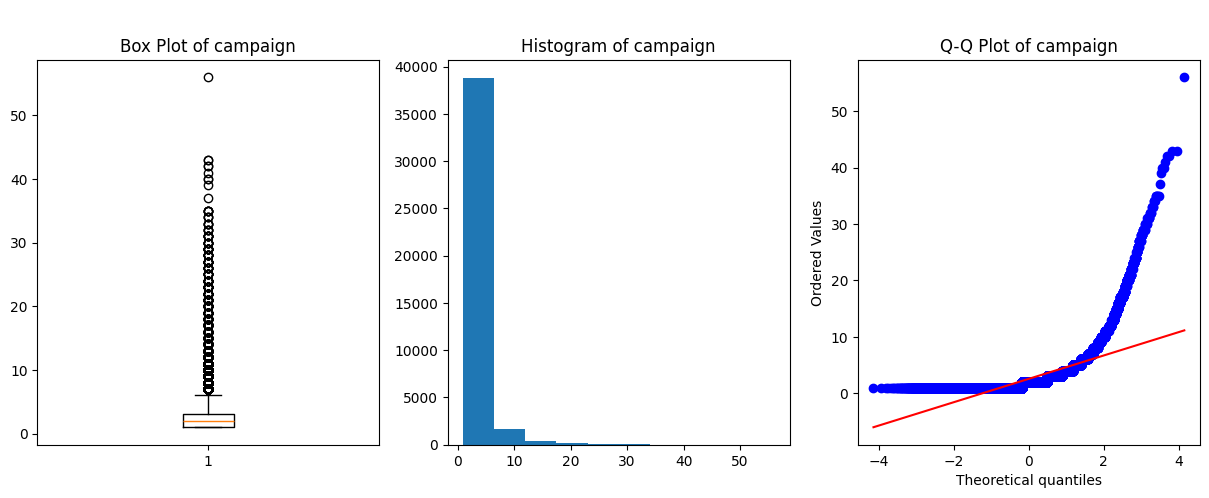

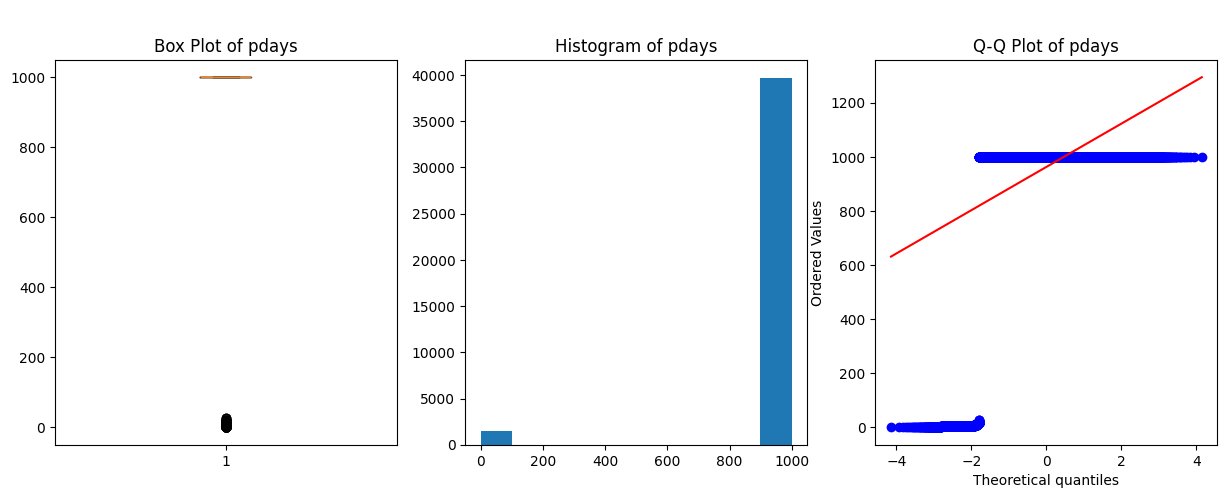

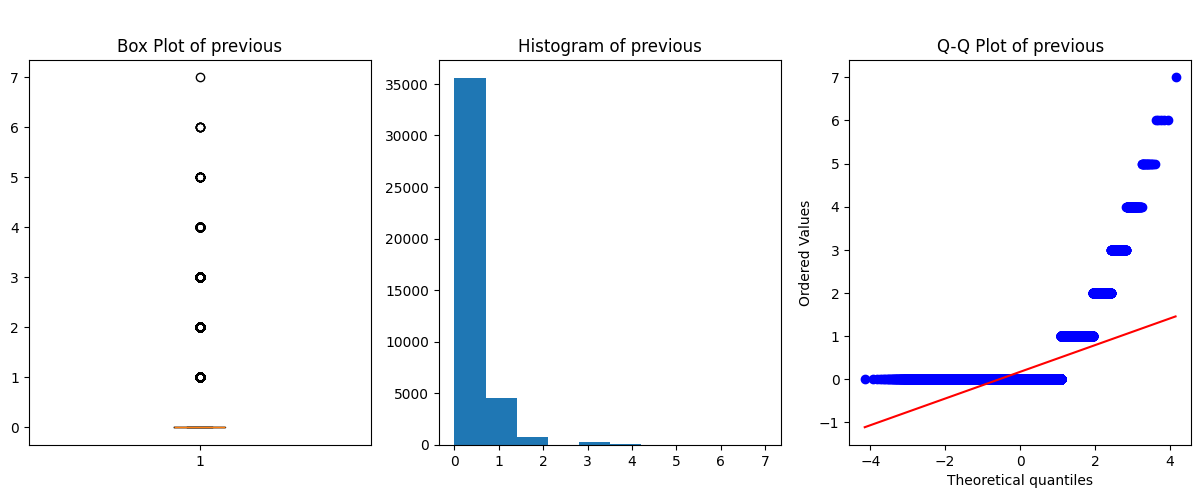

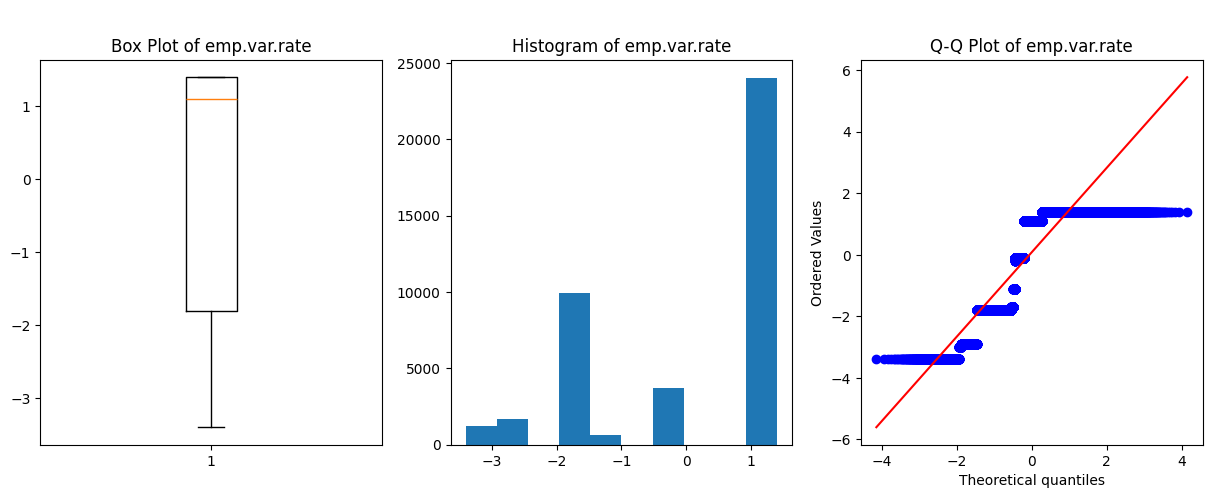

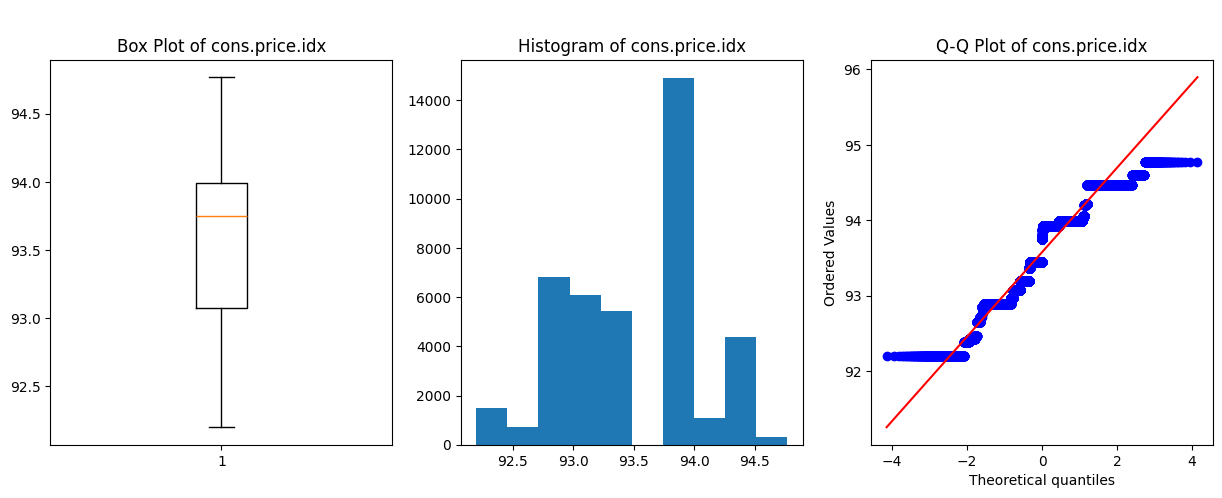

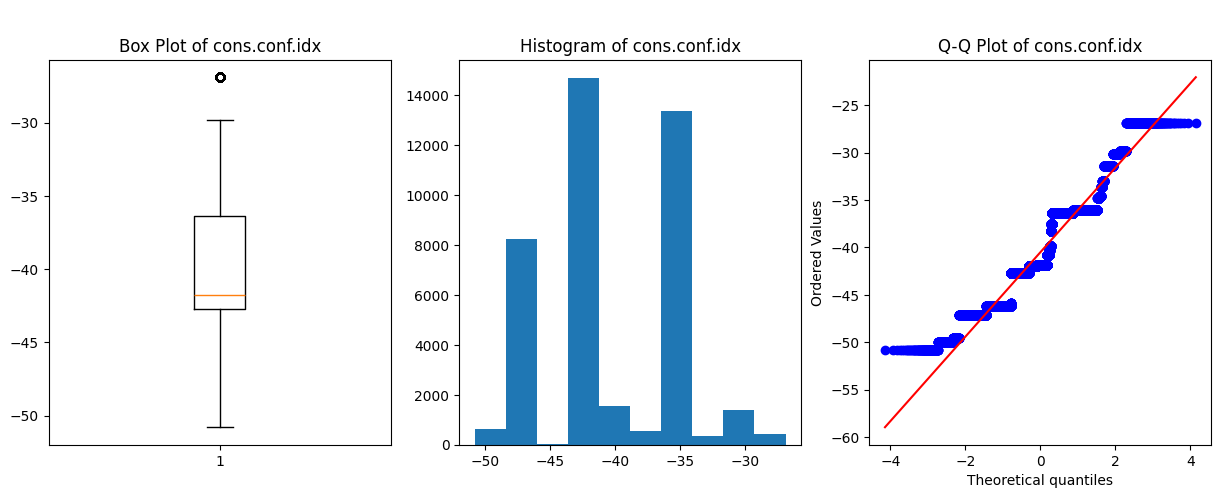

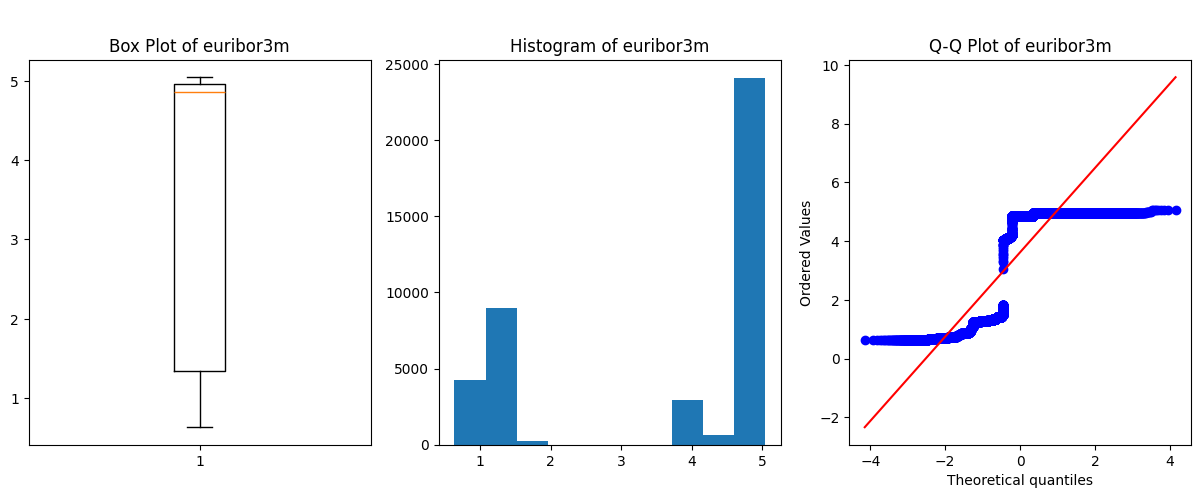

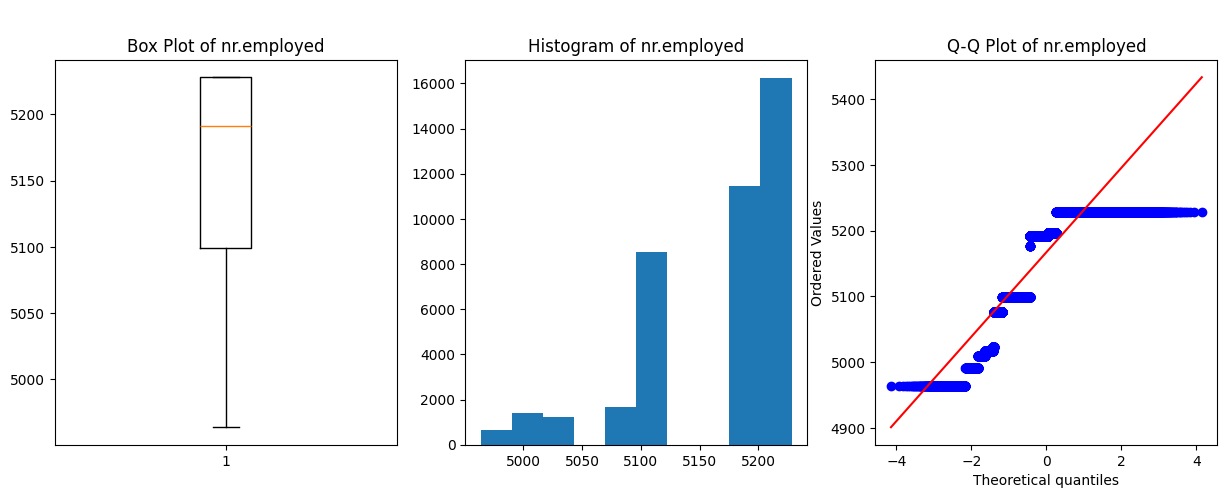

In [7]:
# Preprocessing numerical columns: 
# plot the data
for col in part_1_num_df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='White')
    axes[0].boxplot(part_1_num_df[col])
    axes[0].set_title(f'Box Plot of {col}')
    axes[1].hist(part_1_num_df[col])
    axes[1].set_title(f'Histogram of {col}')
    stats.probplot(part_1_num_df[col], dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {col}')
    plt.show()
    # stats.probplot(part_1_num_df[col], dist="norm", plot=plt)
    # plt.title(f'Q-Q Plot of {col}')
    
    # plt.tight_layout()
    # plt.show()

Based on the graph, 
- Look like there is a single outlier in field: cons.conf.idx column
- Values in field age, campaign and previous are right-skewed
- Value in field nr.employeed is left-skewed

Reduce the skewness before scaling. We will apply transformations to the dataset. We are using x² (for left skewed) and sqrt transformations (for right skewed).

/opt/anaconda3/envs/ber_aiml_py311/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


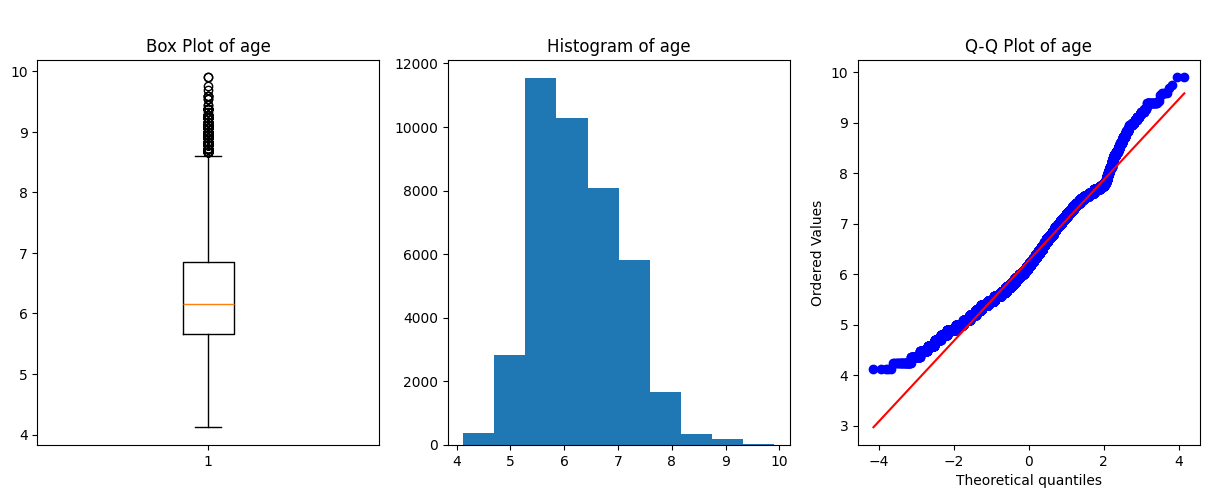

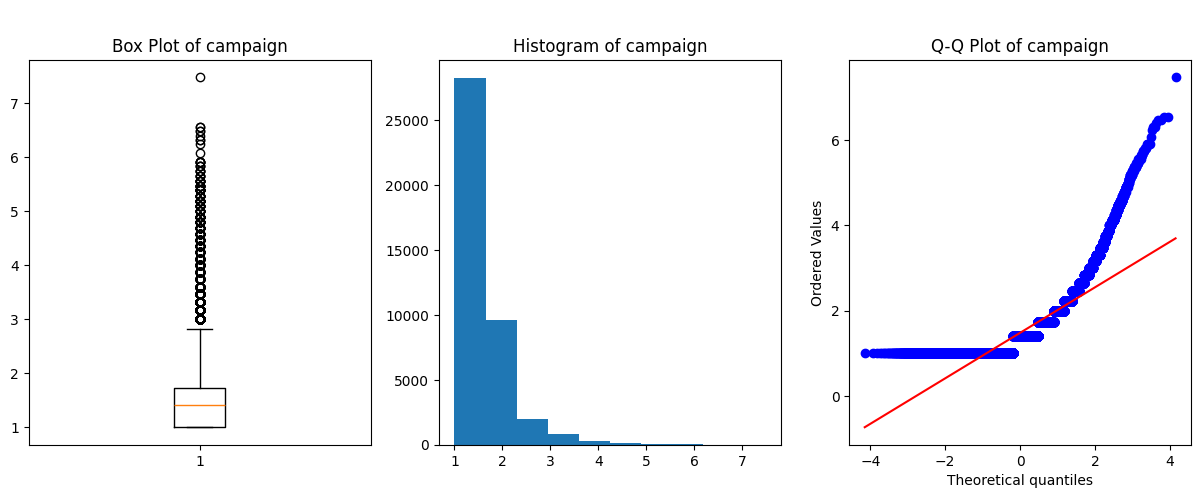

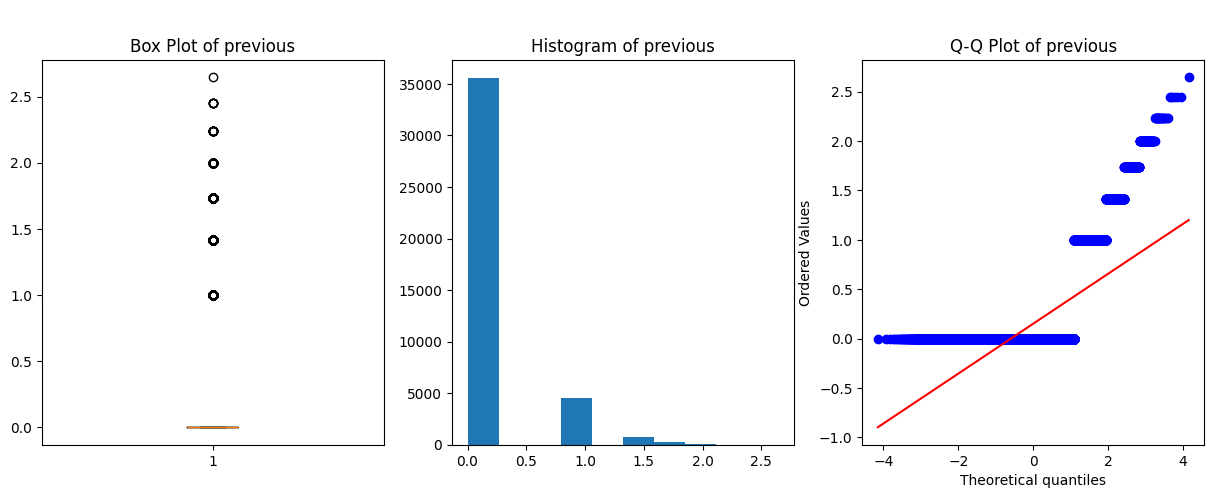

In [8]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

to_sqrt = ['age', 'campaign', 'previous']
data_new = sqrt_transformer.transform(part_1_num_df[to_sqrt])
for index, col in enumerate(to_sqrt):
    part_1_num_df[col] = data_new[:,index]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='White')
    axes[0].boxplot(part_1_num_df[col])
    axes[0].set_title(f'Box Plot of {col}')

    axes[1].hist(part_1_num_df[col])
    axes[1].set_title(f'Histogram of {col}')

    stats.probplot(part_1_num_df[col], dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {col}')
    plt.show()

/opt/anaconda3/envs/ber_aiml_py311/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


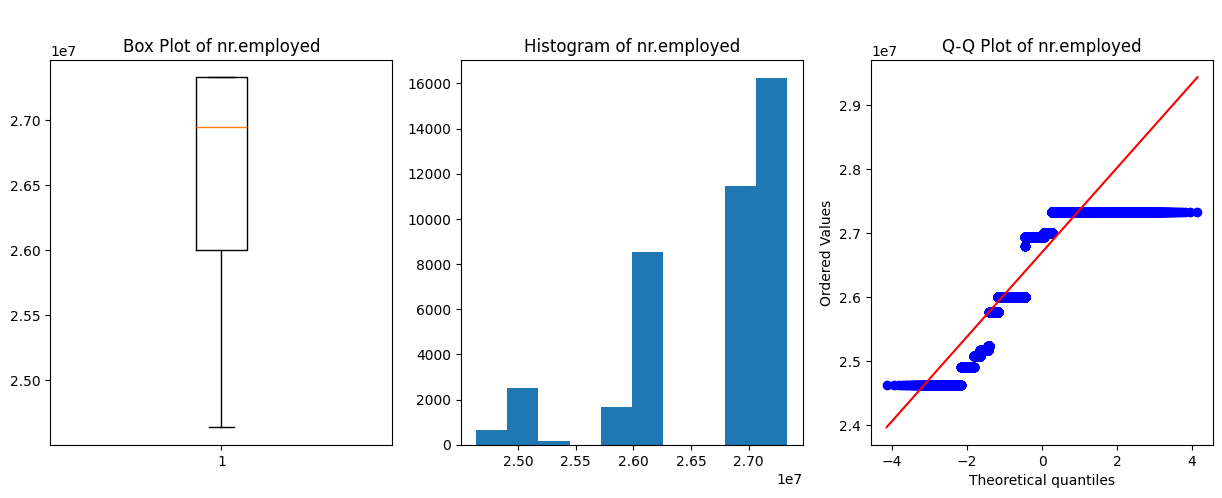

In [9]:
squared_transformer = FunctionTransformer(lambda x: x**2, validate=True)

to_squared = ['nr.employed']
data_new = squared_transformer.transform(part_1_num_df[to_squared])
for index, col in enumerate(to_squared):
    part_1_num_df[col] = data_new[:,index]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='White')
    axes[0].boxplot(part_1_num_df[col])
    axes[0].set_title(f'Box Plot of {col}')

    axes[1].hist(part_1_num_df[col])
    axes[1].set_title(f'Histogram of {col}')

    stats.probplot(part_1_num_df[col], dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {col}')
    plt.show()


#### Preprocessing categorical columns: Identify the categorical columns and their distributions.

In [10]:
part_2_cat_df = df.select_dtypes(exclude=np.number)
part_2_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


Identify uniq values for categorical columns

In [11]:
# print Unique values for each column
for c in part_2_cat_df.columns.sort_values():
    values = part_2_cat_df[c].value_counts().index.tolist()
    str_values = ", ".join([str(v) for v in values])
    print(f"- {c}: {str_values}")

- contact: cellular, telephone
- day_of_week: thu, mon, wed, tue, fri
- default: no, unknown, yes
- education: university.degree, high.school, basic.9y, professional.course, basic.4y, basic.6y, unknown, illiterate
- housing: yes, no, unknown
- job: admin., blue-collar, technician, services, management, retired, entrepreneur, self-employed, housemaid, unemployed, student, unknown
- loan: no, yes, unknown
- marital: married, single, divorced, unknown
- month: may, jul, aug, jun, nov, apr, oct, sep, mar, dec
- poutcome: nonexistent, failure, success
- y: no, yes


Converting pdays to categorical variable as Contacted or Not contacted previously.

In [12]:
part_1_num_df['pdays'] = np.where(part_1_num_df['pdays'] < 999, 0, 1).tolist()

Using label encoding for all the categorical columns

In [13]:
for col in part_2_cat_df.columns:
    part_2_cat_df[col] = part_2_cat_df[col].astype('category').cat.codes

In [14]:
part_2_cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


Merging part_1 abd part_2 dataframes

In [15]:
final_df = part_2_cat_df.join(part_1_num_df)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  int8   
 1   marital         41188 non-null  int8   
 2   education       41188 non-null  int8   
 3   default         41188 non-null  int8   
 4   housing         41188 non-null  int8   
 5   loan            41188 non-null  int8   
 6   contact         41188 non-null  int8   
 7   month           41188 non-null  int8   
 8   day_of_week     41188 non-null  int8   
 9   poutcome        41188 non-null  int8   
 10  y               41188 non-null  int8   
 11  age             41188 non-null  float64
 12  campaign        41188 non-null  float64
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
feature_df = final_df.drop('y',axis=1)
target_df = pd.DataFrame(final_df['y'], columns=["y"])
target_df = target_df.reset_index(drop=True)


#### Identify correlations in the training data

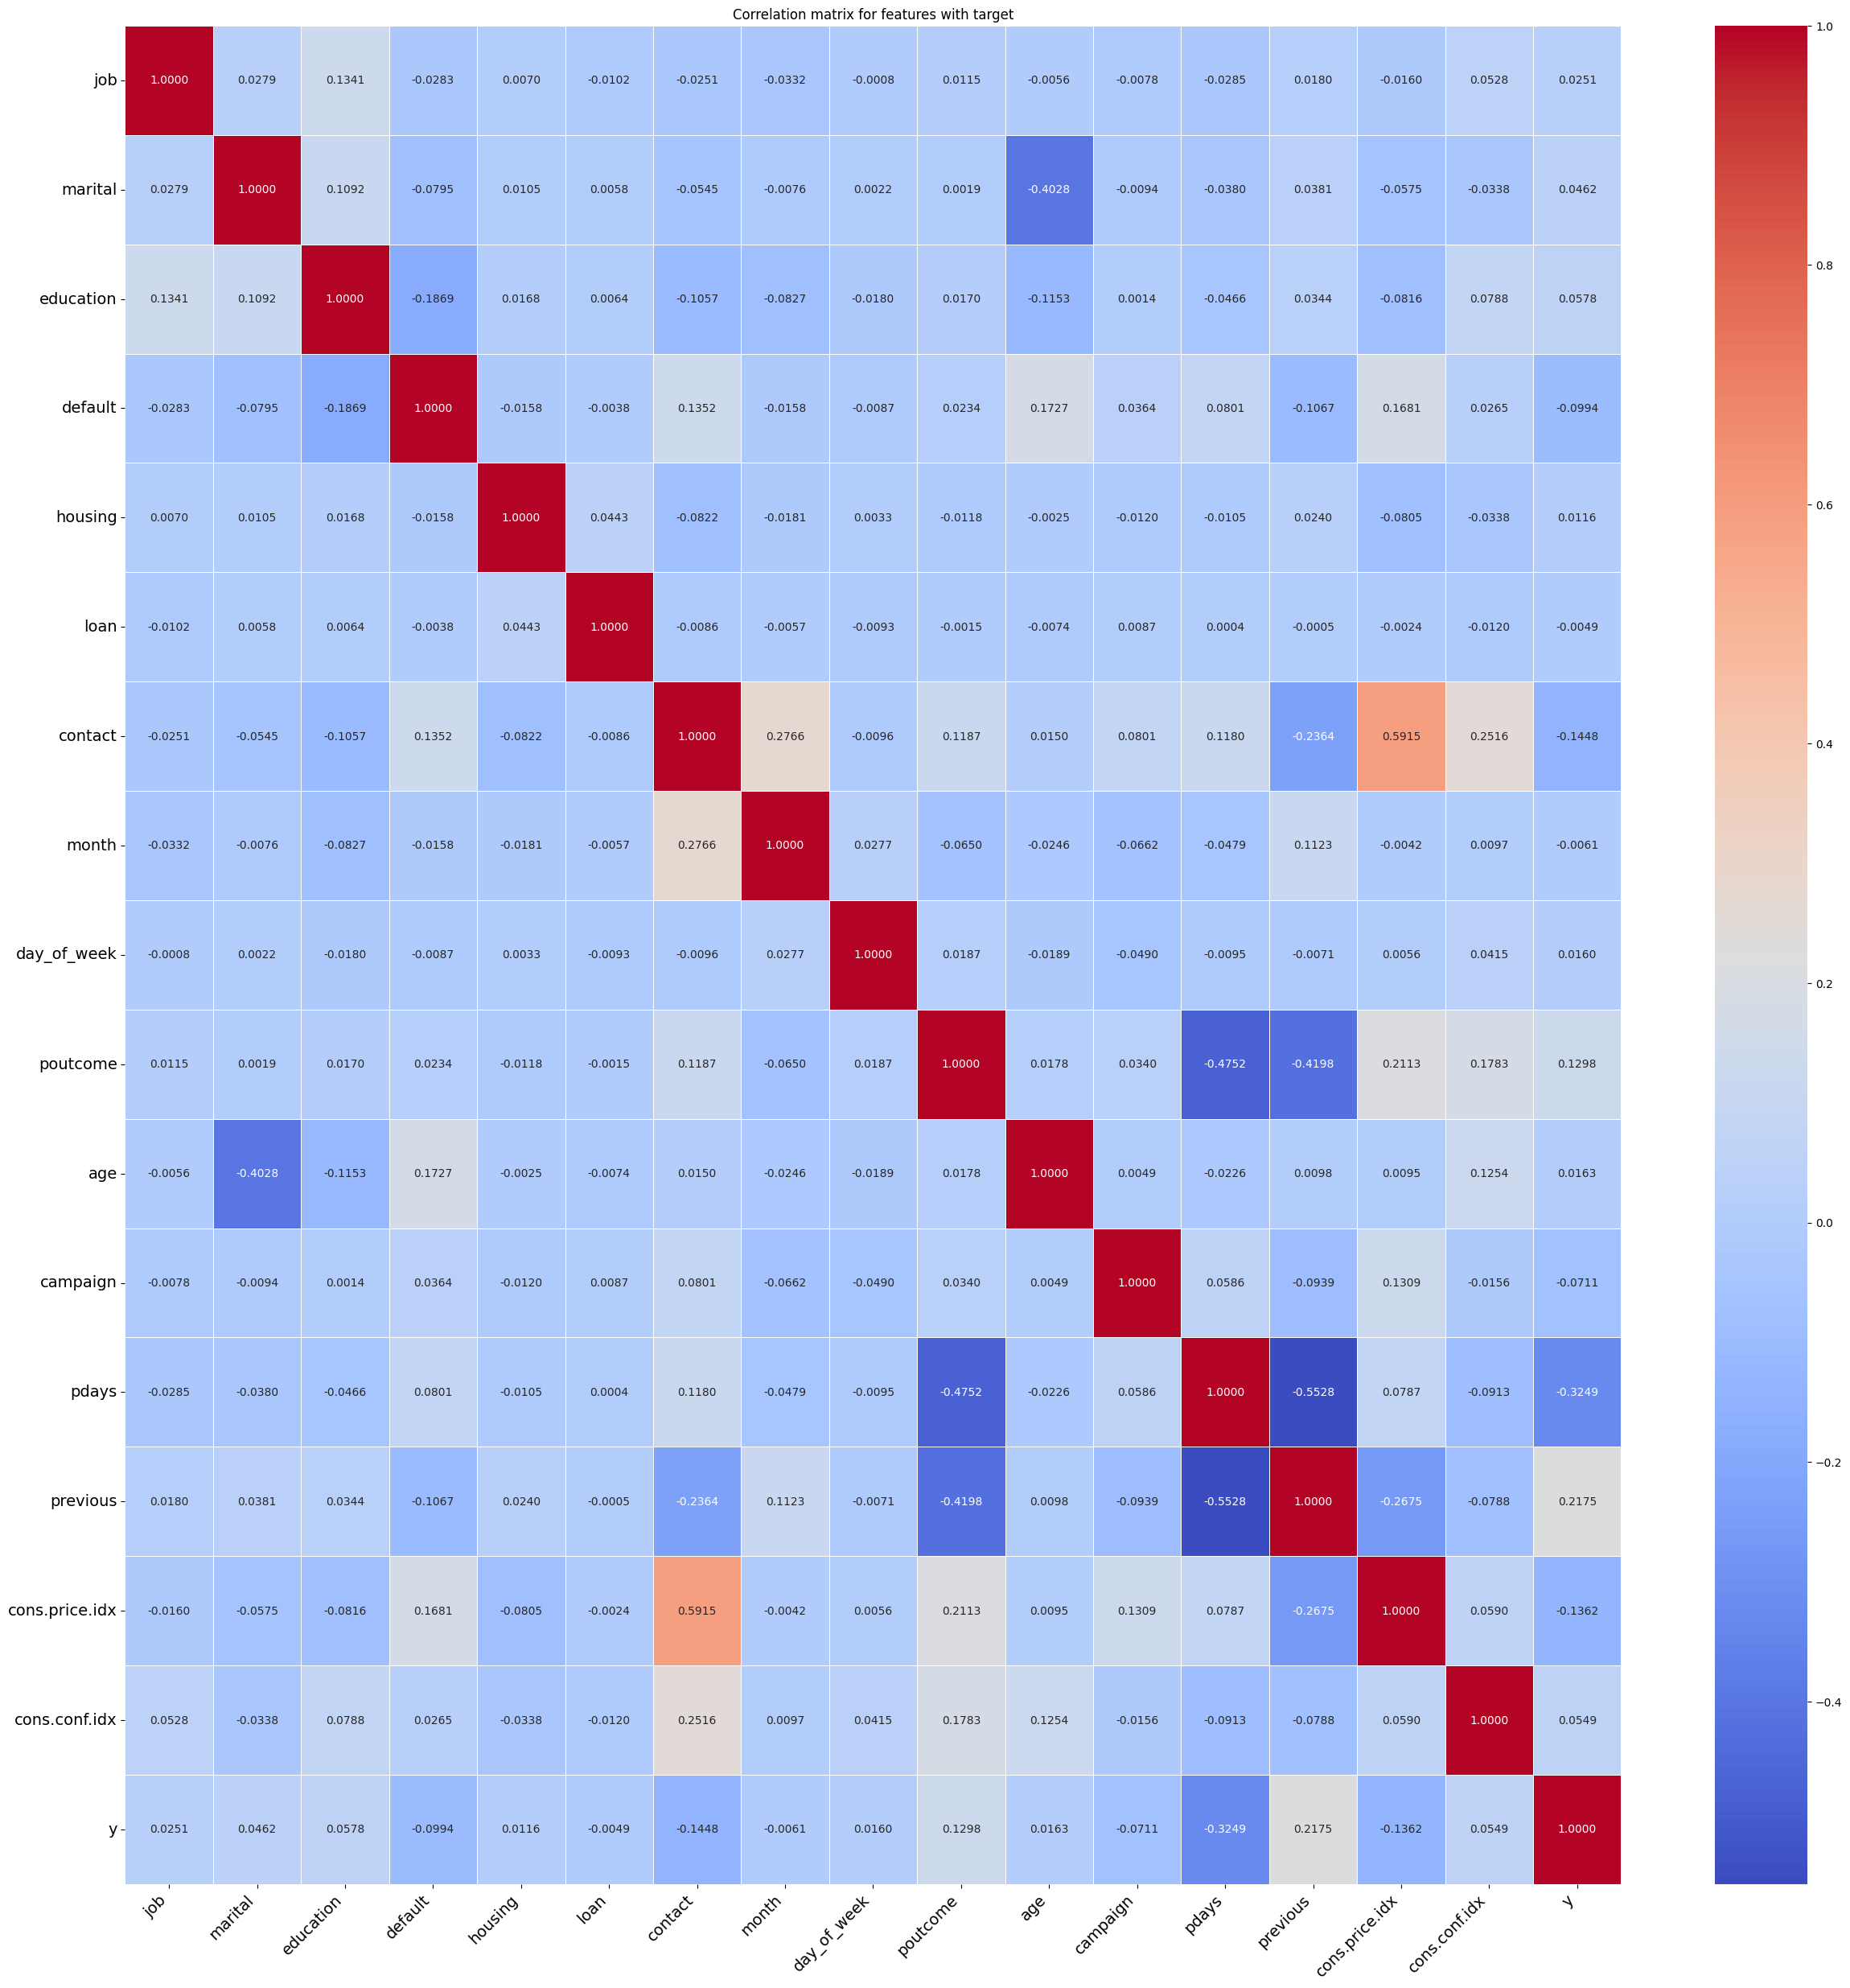

In [44]:
correlation_mat = pd.concat([feature_df, target_df], axis=1).corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation_mat, cmap='coolwarm', fmt=".4f", linewidths=.5, annot = True)
# Get and set the font size for the axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14, ha='right')

plt.title("Correlation matrix for features with target")
plt.savefig('./images/correlation_plot.png')
plt.show()

Indentify higly correlated variables


In [18]:
# Calculate the absolute correlation matrix
corr_matrix = correlation_mat.abs()
# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for what you consider a "high" correlation
threshold = 0.8

# Find column pairs with correlation above the threshold
highly_correlated = [(column, row, f"{upper_tri.loc[row, column]:.4f}") for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]

print(highly_correlated)

[('euribor3m', 'emp.var.rate', '0.9722'), ('nr.employed', 'emp.var.rate', '0.9088'), ('nr.employed', 'euribor3m', '0.9464')]


In [19]:
feature_df = feature_df.drop(['euribor3m','nr.employed','emp.var.rate'], axis=1)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  int8   
 1   marital         41188 non-null  int8   
 2   education       41188 non-null  int8   
 3   default         41188 non-null  int8   
 4   housing         41188 non-null  int8   
 5   loan            41188 non-null  int8   
 6   contact         41188 non-null  int8   
 7   month           41188 non-null  int8   
 8   day_of_week     41188 non-null  int8   
 9   poutcome        41188 non-null  int8   
 10  age             41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
dtypes: float64(5), int64(1), int8(10)
memory usage: 2.3 MB


#### Target variable distribution

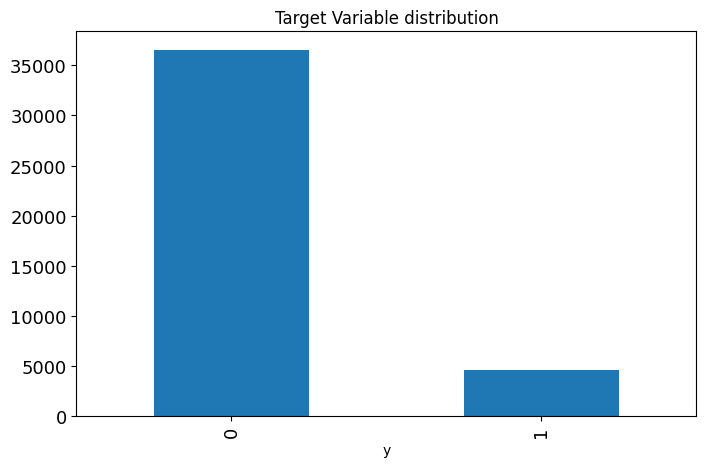

In [39]:
# Plotting the target variable distribution
target_df['y'].value_counts().plot(kind='bar', figsize=(8, 5), fontsize=13,title='Target Variable distribution')
plt.savefig('./images/target_variable_distribution.png')


#### Split the dataset for training and testing

Shape of: (Training Dataset before and after SMOTE)
- x_train before: (32950, 16)
- y_train before: (32950, 1)
- x_train after: (58538, 16)
- y_train after: (58538, 1)

Balance of positive and negative classes (%): y
0    50.0
1    50.0
Name: proportion, dtype: float64


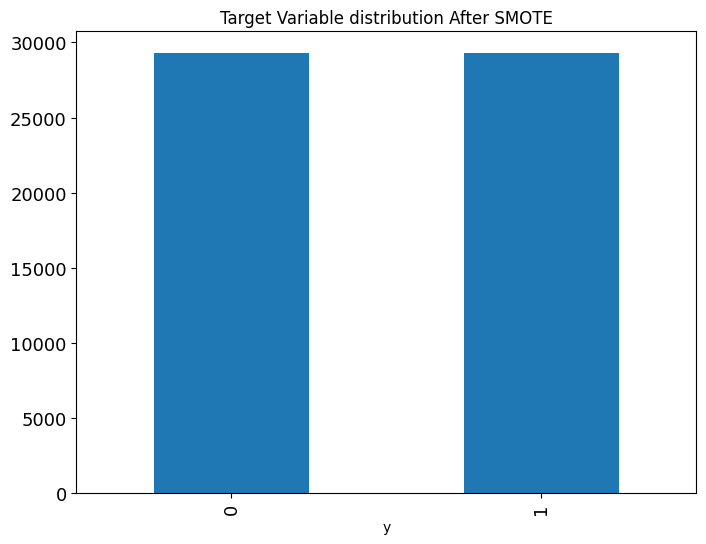

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target_df, test_size = 0.2, random_state = 101)
sm = SMOTE(random_state=42)

print("Shape of: (Training Dataset before and after SMOTE)")
print(f'- x_train before: {x_train.shape}')
print(f'- y_train before: {y_train.shape}')

x_train, y_train = sm.fit_resample(x_train, y_train)

print(f'- x_train after: {x_train.shape}')
print(f'- y_train after: {y_train.shape}')
print('\nBalance of positive and negative classes (%):',y_train.value_counts(normalize=True) * 100)



y_train['y'].value_counts().plot(kind='bar', figsize=(8, 6), fontsize=13, title='Target Variable distribution After SMOTE')
plt.savefig('./images/smote_target_variable.png')


We want to reduce the dimensionality, we will use Principal Component Analysis to get the principal components and reduce the dimensionality

Number of components to capture 95% variance: 14


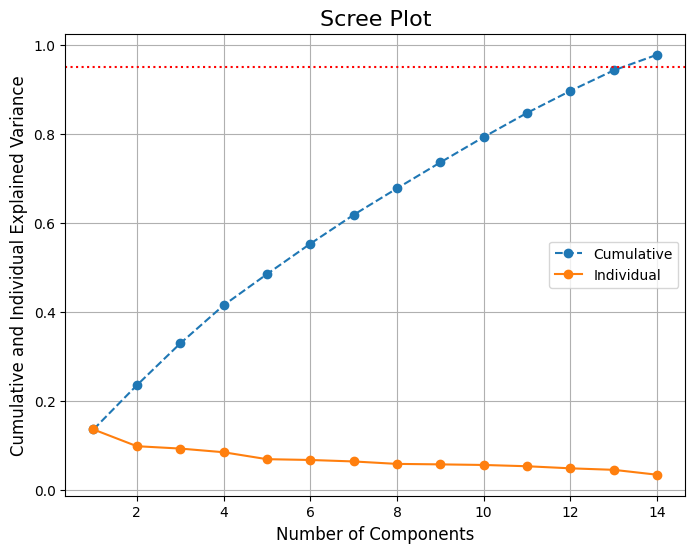

In [36]:
# Standardize the data
# standardize features before PCA, as it is sensitive to the scale of the data.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Calculate the number of components to explain 95% variance
# Perform PCA
pca = PCA()
principal_components = pca.fit(x_train_scaled)
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find the number of components for 95% variance
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components to capture 95% variance: {n_components}")
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.fit_transform(x_test_scaled)
#Create a new DataFrame with the principal components
column_names = [f'PC{i+1}' for i in range(x_train_pca.shape[1])]
x_train_pca_df = pd.DataFrame(data=x_train_pca, columns=column_names)
x_test_pca_df = pd.DataFrame(data=x_test_pca, columns=column_names)

# Create the Scree Plot
plt.figure(figsize=(8, 6))
# Calculate the cumulative sum of the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.plot(range(1, len(cumulative_variance) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')

plt.title('Scree Plot', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative and Individual Explained Variance', fontsize=12)
plt.legend(['Cumulative', 'Individual'], loc='best')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.savefig('./images/pca_component_ratio.png')
plt.show()


#### Training and Fiting the model (classifiers):

In [23]:
import time
# Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42), # Specify solver
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

results = {}

for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    # Train the classifier on PCA-transformed training data
    # Use .ravel() to convert y_train to a 1D array, y_train is a DataFrame, convert to numpy array first
    classifier.fit(x_train_pca, y_train.to_numpy().ravel())
    train_time = None
    start_time = time.time()
    classifier.fit(x_train_pca, y_train.to_numpy().ravel())
    train_time = time.time() - start_time

    # Make predictions on PCA-transformed test data
    y_pred = classifier.predict(x_test_pca)

    # Evaluate the classifier
    train_accuracy = accuracy_score(y_train.to_numpy().ravel(), classifier.predict(x_train_pca))
    test_accuracy = accuracy_score(y_test, y_pred)

    results[name] = {"name": name, 'train_time': train_time, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}



Training and evaluating K-Nearest Neighbors...
Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Support Vector Machine...


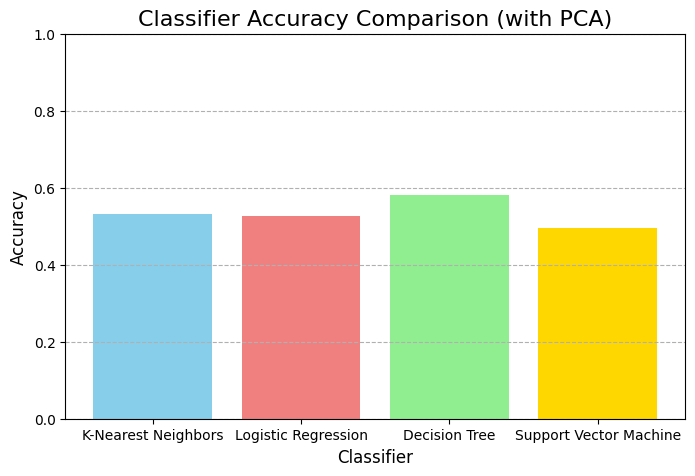


Summary of Classifier Performance:
| Model | Train Time (s) | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
| K-Nearest Neighbors | 0.0244 | 0.9033 | 0.5307 |
| Logistic Regression | 0.0358 | 0.6926 | 0.5276 |
| Decision Tree | 1.3822 | 0.9962 | 0.5806 |
| Support Vector Machine | 40.7820 | 0.7891 | 0.4959 |
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, K-Nearest Neighbors to Support Vector Machine
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   train_time      4 non-null      float64
 1   train_accuracy  4 non-null      float64
 2   test_accuracy   4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes


In [ ]:
accuracy_scores = {name: res['train_accuracy'] for name, res in results.items()}
summary_df = pd.DataFrame(results).T
# Create a bar plot of accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Classifier Accuracy Comparison (with PCA)', fontsize=16)
plt.ylim(0, 1) # Ensure y-axis starts at 0
plt.grid(axis='y', linestyle='--')
plt.savefig('./images/classifier_accuracy_comparision.png')
plt.show()


# Generate a summary table
print("\nSummary of Classifier Performance:")
print("| Model | Train Time (s) | Train Accuracy | Test Accuracy |")
print("| ----- | ---------- | -------------  | -----------   |")
for name, metrics in results.items():
    print(f"| {name} | {metrics['train_time']:.4f} | {metrics['train_accuracy']:.4f} | {metrics['test_accuracy']:.4f} |")
summary_df.info()


In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# 1. Box plot for accuracy on the primary axis
sns.boxplot(x='model', y='train_accuracy', data=summary_df, ax=ax1, palette='pastel')
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Accuracy', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1) # Set y-axis limit for accuracy

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions